In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, radians, pi
from lidar_to_grid import file_read
import lidar_to_grid as lg

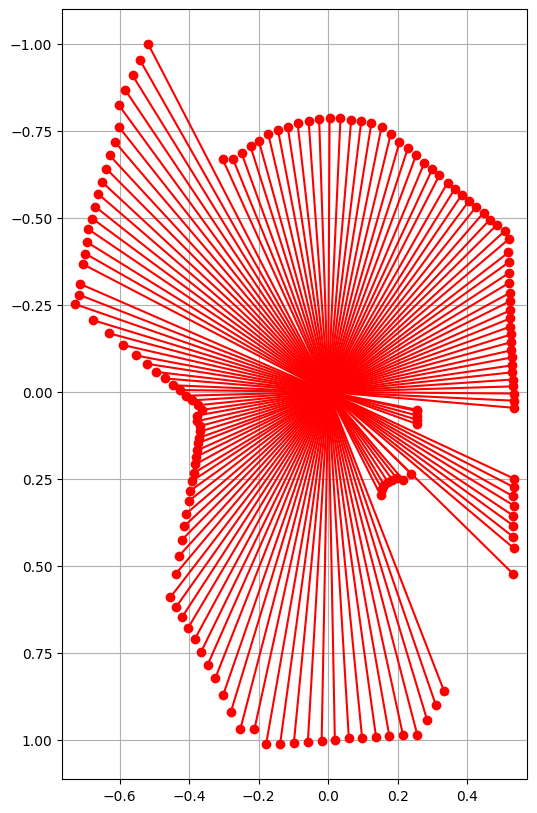

In [2]:
ang, dist = file_read("lidar01.csv")
ox = np.sin(ang) * dist
oy = np.cos(ang) * dist
plt.figure(figsize=(6,10))
plt.plot([oy, np.zeros(np.size(oy))], [ox, np.zeros(np.size(oy))], "ro-") # lines from 0,0 to the
plt.axis("equal")
bottom, top = plt.ylim()  # return the current ylim
plt.ylim((top, bottom)) # rescale y axis, to match the grid orientation
plt.grid(True)
plt.show()

The grid map is  150 x 100 .


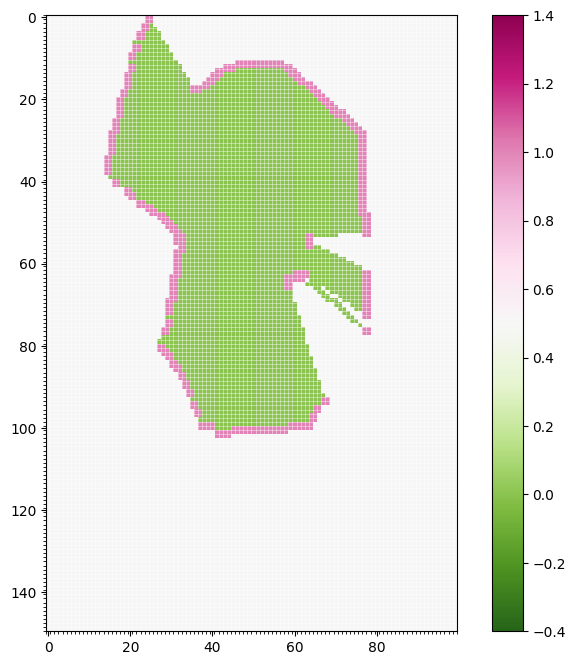

In [3]:
xyreso = 0.02  # x-y grid resolution
yawreso = math.radians(3.1)  # yaw angle resolution [rad]
ang, dist = file_read("lidar01.csv")
ox = np.sin(ang) * dist
oy = np.cos(ang) * dist
pmap, minx, maxx, miny, maxy, xyreso = lg.generate_ray_casting_grid_map(ox, oy, xyreso, False)
xyres = np.array(pmap).shape
plt.figure(figsize=(20,8))
plt.subplot(122)
plt.imshow(pmap, cmap = "PiYG_r")
plt.clim(-0.4, 1.4)
plt.gca().set_xticks(np.arange(-.5, xyres[1], 1), minor = True)
plt.gca().set_yticks(np.arange(-.5, xyres[0], 1), minor = True)
plt.grid(True, which="minor", color="w", linewidth = .6, alpha = 0.5)
plt.colorbar()
plt.show()